In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
from sklearn import metrics,model_selection

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
import missingno as mno

In [7]:
train=pd.read_csv('train.csv')

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test=pd.read_csv('test.csv')

In [10]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
#getting designations

In [12]:
def t (title) :
    return title.split(',')[1].split('.')[0] 

In [13]:
test['title']=test['Name'].apply(lambda x: t(x))

In [14]:
train['title']=train['Name'].apply(lambda x: t(x))

In [15]:
#vizualizing missing data

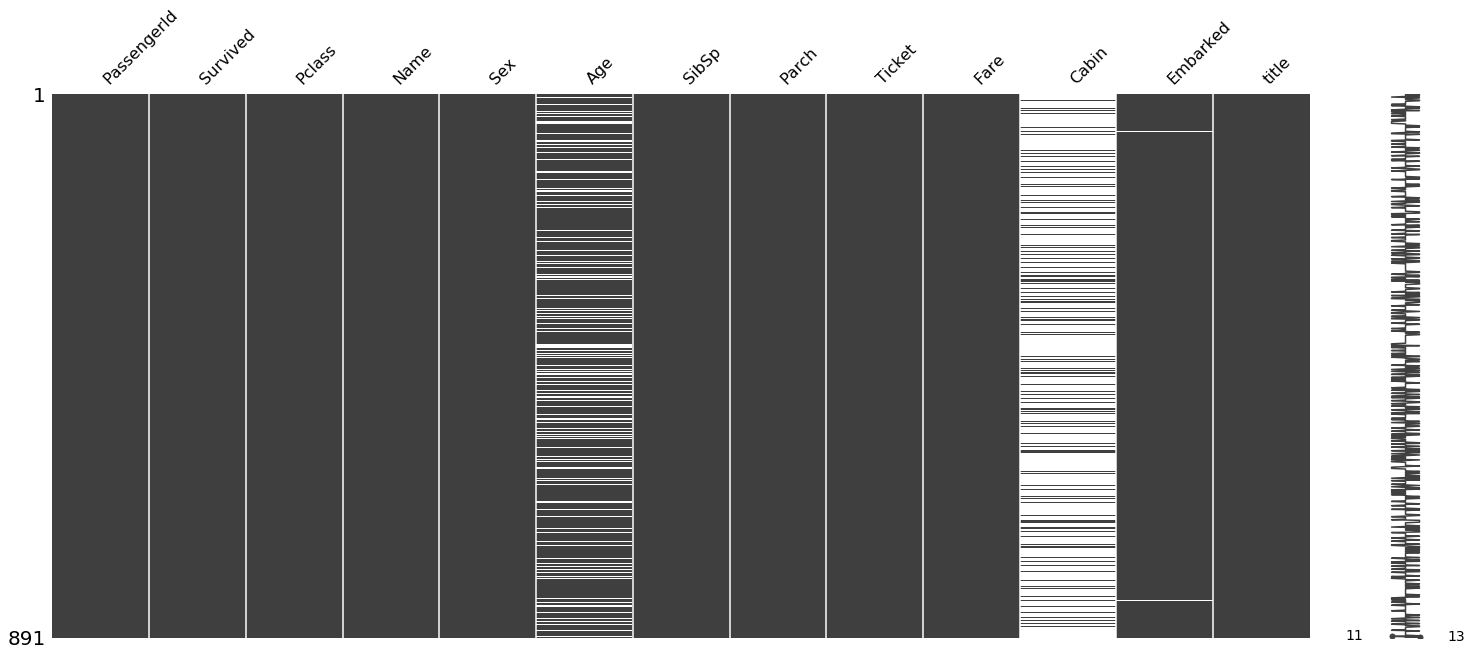

In [16]:
mno.matrix(train)

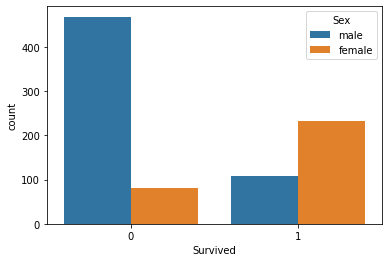

In [17]:
sns.countplot(x='Survived',data=train,hue='Sex')

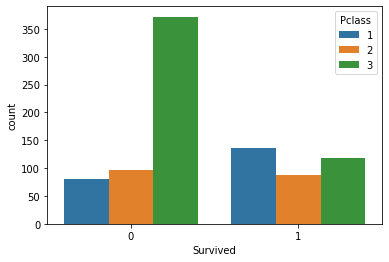

In [18]:
sns.countplot(x='Survived',data=train,hue='Pclass')

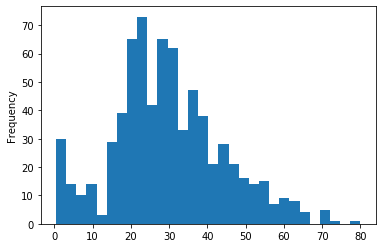

In [19]:
train['Age'].plot.hist(bins=30)

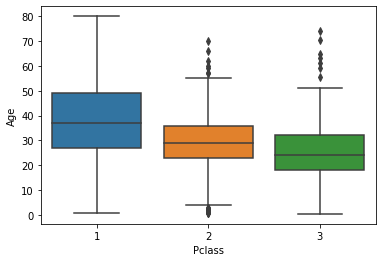

In [20]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [21]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return train[train['Pclass']==1].mean()['Age']

        elif Pclass == 2:
            return train[train['Pclass']==2].mean()['Age']

        else:
            return train[train['Pclass']==3].mean()['Age']

    else:
        return Age
    

In [22]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

In [23]:
test['Age']=test[['Age','Pclass']].apply(impute_age,axis=1)

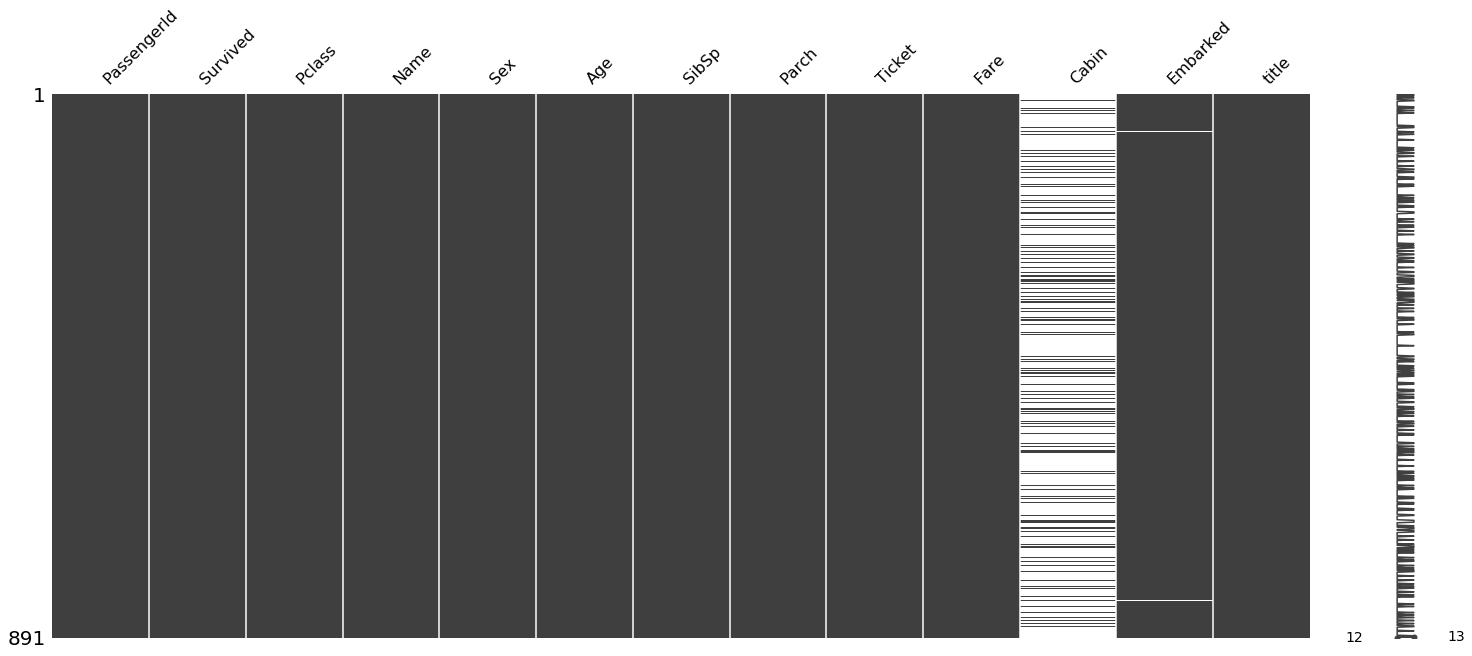

In [24]:
mno.matrix(train)

In [25]:
train.drop('Cabin',axis=1,inplace=True)

In [26]:
train.dropna(inplace=True)

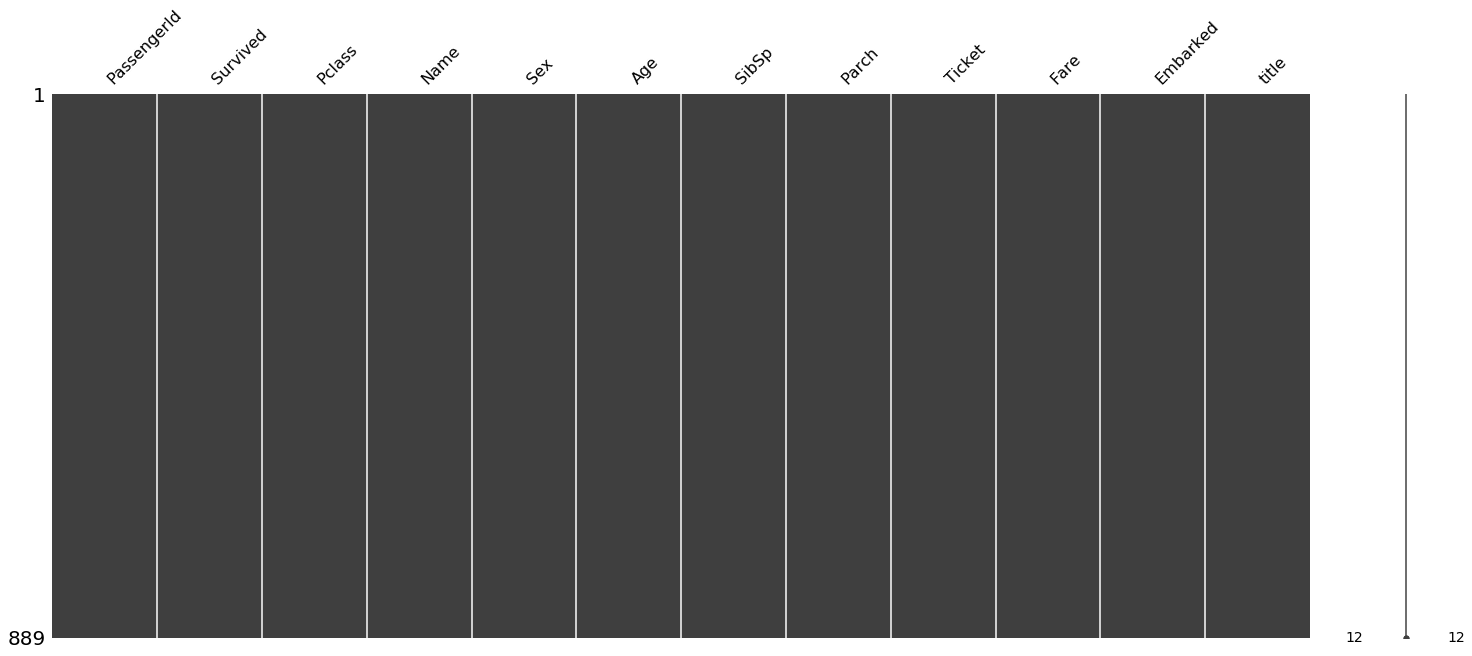

In [27]:
mno.matrix(train)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [43]:
train_df=train[[ 'Survived', 'Pclass' ,'Sex','Parch','Embarked', 'title']]

In [44]:
train_df.head(4)

,Survived,Pclass,Sex,Parch,Embarked,title
0,0,3,male,0,S,Mr
1,1,1,female,0,C,Mrs
2,1,3,female,0,S,Miss
3,1,1,female,0,S,Mrs


In [47]:
train_c=train_df.apply(LabelEncoder().fit_transform)

In [48]:
train_c.head()

,Survived,Pclass,Sex,Parch,Embarked,title
0,0,2,1,0,2,11
1,1,0,0,0,0,12
2,1,2,0,0,2,8
3,1,0,0,0,2,12
4,0,2,1,0,2,11


In [49]:
train_c['age']=train['Age']
train_c['fare']=train['Fare']

In [53]:
train_c['SibSp']=train['SibSp']

In [54]:
train_c.head()

,Survived,Pclass,Sex,Parch,Embarked,title,age,fare,SibSp
0,0,2,1,0,2,11,22.0,7.2500,1
1,1,0,0,0,0,12,38.0,71.2833,1
2,1,2,0,0,2,8,26.0,7.9250,0
3,1,0,0,0,2,12,35.0,53.1000,1
4,0,2,1,0,2,11,35.0,8.0500,0


In [92]:
x_trains=train_c[[ 'Pclass', 'Sex',  'SibSp', 'Parch', 'Embarked','title','age','fare']]
y_trains=train_c['Survived']

In [93]:
x_trains.head(3)

,Pclass,Sex,SibSp,Parch,Embarked,title,age,fare
0,2,1,1,0,2,11,22.0,7.2500
1,0,0,1,0,0,12,38.0,71.2833
2,2,0,0,0,2,8,26.0,7.9250


In [94]:
model=LogisticRegression()

In [97]:
log=model.fit(x_trains,y_trains)

C:\Users\aditya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [99]:
acc=round(log.score(x_trains,y_trains)*100,2)

In [100]:
pred=model_selection.cross_val_predict(LogisticRegression(),x_trains,y_trains,cv=10,n_jobs=-1)
pred_cv=round(metrics.accuracy_score(y_trains,pred)*100,2)

In [101]:

pred_cv

79.75

In [102]:
acc

80.88

In [66]:
#applying our model on test data

In [67]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


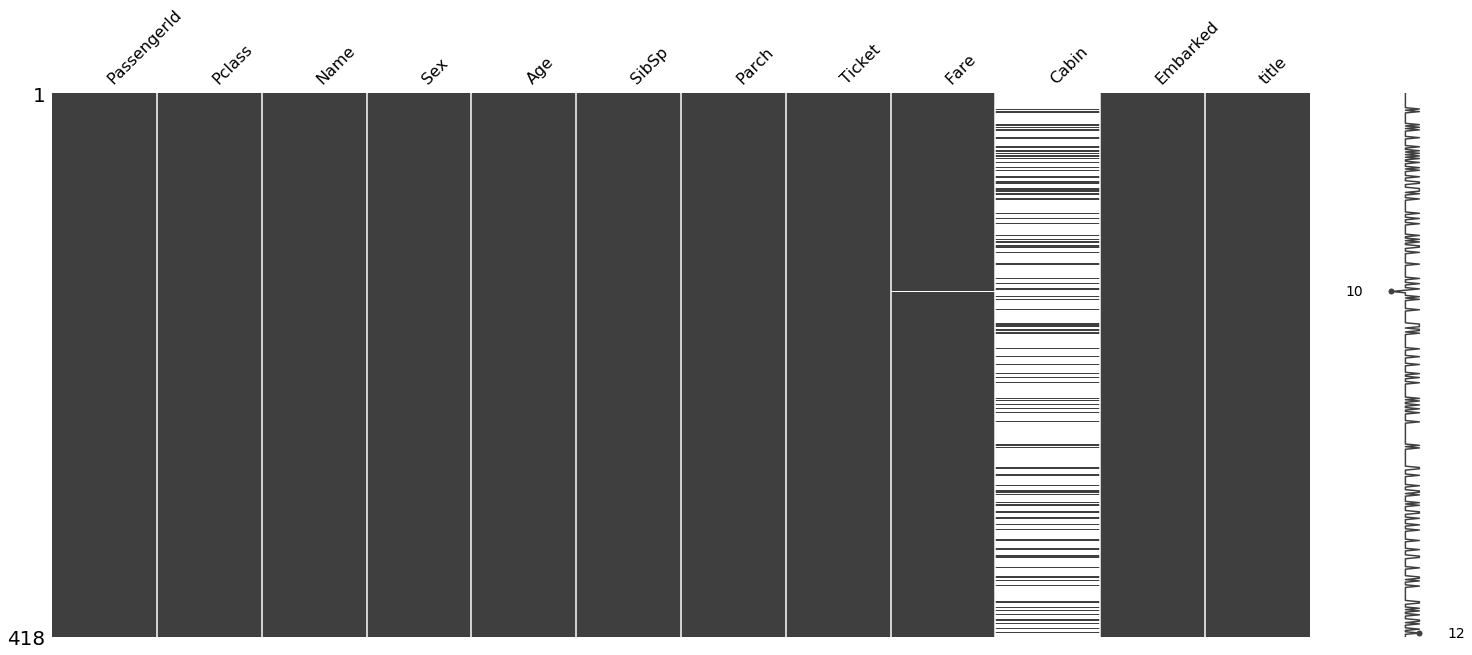

In [68]:
mno.matrix(test)

In [70]:
test_df=test[[ 'Pclass' ,'Sex','SibSp','Parch','Embarked', 'title']]

In [72]:
test_df.head()

,Pclass,Sex,SibSp,Parch,Embarked,title
0,3,male,0,0,Q,Mr
1,3,female,1,0,S,Mrs
2,2,male,0,0,Q,Mr
3,3,male,0,0,S,Mr
4,3,female,1,1,S,Mrs


In [73]:
test_c=test_df.apply(LabelEncoder().fit_transform)

In [74]:
test_c.head()

,Pclass,Sex,SibSp,Parch,Embarked,title
0,2,1,0,0,1,5
1,2,0,1,0,2,6
2,1,1,0,0,1,5
3,2,1,0,0,2,5
4,2,0,1,1,2,6


In [104]:
test_c[['age','fare']]=test[['Age','Fare']]

In [105]:
test_c.head()

,Pclass,Sex,SibSp,Parch,Embarked,title,age,fare
0,2,1,0,0,1,5,34.5,7.8292
1,2,0,1,0,2,6,47.0,7.0000
2,1,1,0,0,1,5,62.0,9.6875
3,2,1,0,0,2,5,27.0,8.6625
4,2,0,1,1,2,6,22.0,12.2875


In [106]:
test_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int32  
 2   SibSp     418 non-null    int64  
 3   Parch     418 non-null    int64  
 4   Embarked  418 non-null    int32  
 5   title     418 non-null    int32  
 6   age       418 non-null    float64
 7   fare      417 non-null    float64
dtypes: float64(2), int32(3), int64(3)
memory usage: 21.4 KB


In [110]:
test_c['fare'].fillna(test_c['fare'].mean(),inplace=True)

In [111]:
test_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int32  
 2   SibSp     418 non-null    int64  
 3   Parch     418 non-null    int64  
 4   Embarked  418 non-null    int32  
 5   title     418 non-null    int32  
 6   age       418 non-null    float64
 7   fare      418 non-null    float64
dtypes: float64(2), int32(3), int64(3)
memory usage: 21.4 KB


In [112]:
prediction=model.predict(test_c)

In [114]:
#submission

In [115]:
sub=pd.DataFrame()
sub['Id']=test['PassengerId']

In [116]:
sub['survived']=prediction

In [117]:
sub.head()

,Id,survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [125]:
sub.rename(columns={'Id':'PassengerId'},inplace=True)

In [126]:
sub.head()

,PassengerId,survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [127]:
sub.to_csv("titanic_kaggle.csv",index=False)